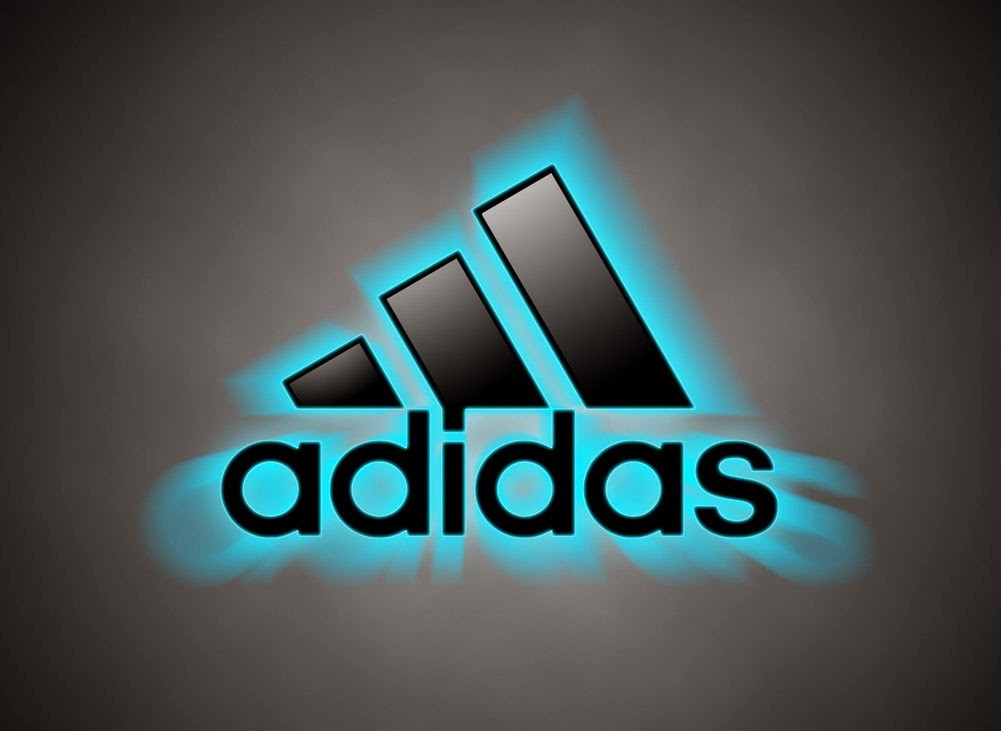

# Required library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Total sales by different groups

sales by retailer

sales by region

sales by products

sales by method

Total sales trend over years


In [2]:
Data = pd.read_excel('Adidas US Sales Datasets.xlsx')

In [3]:
Data.head()

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              0.50     In-store  
1          150000.0              0.30     In-store  
2          140000.0              0.35     In-store  
3          133875.0              0.35     In-store  
4          162000.0              0.30     In-store

In [4]:
Data.tail()

Retailer  Retailer ID Invoice Date     Region          State  \
9643  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   

            City                  Product  Price per Unit  Units Sold  \
9643  Manchester            Men's Apparel            50.0          64   
9644  Manchester          Women's Apparel            41.0         105   
9645  Manchester    Men's Street Footwear            41.0         184   
9646  Manchester  Men's Athletic Footwear            42.0          70   
9647  Manchester  Women's Street Footwear            29.0          83   

      Total Sales  Operating Profit  Operating Margin Sales Method  
9643       3200.0            896.00              0.28       Outlet  
9644       4305.0           1377.60              0.32       Outlet  
9645       7544.0           2791.28              0.37       Outlet  
9646       2940.0           1234.80              0.42       Outlet  
9647       2407.0            649.89              0.27       Outlet

In [5]:
Data.sample(5)

Retailer  Retailer ID Invoice Date     Region          State  \
8315  Sports Direct      1197831   2021-04-18      South      Tennessee   
1137  Sports Direct      1197831   2021-10-01      South        Alabama   
7590  Sports Direct      1185732   2021-07-13  Northeast  Massachusetts   
946   Sports Direct      1197831   2021-03-24      South      Tennessee   
4784         Kohl's      1189833   2021-02-02    Midwest        Montana   

            City                    Product  Price per Unit  Units Sold  \
8315   Knoxville  Women's Athletic Footwear            32.0         196   
1137  Birmingham    Men's Athletic Footwear            20.0         625   
7590      Boston  Women's Athletic Footwear            44.0          56   
946    Knoxville    Women's Street Footwear            30.0         475   
4784    Billings      Men's Street Footwear            37.0         203   

      Total Sales  Operating Profit  Operating Margin Sales Method  
8315       6272.0           3825.92              0.61       Outlet  
1137     125000.0          62500.00              0.50       Outlet  
7590       2464.0            887.04              0.36       Online  
946      142500.0          57000.00              0.40       Outlet  
4784       7511.0           4431.49              0.59       Online

In [6]:
Data.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [7]:
Data.shape

(9648, 13)

In [8]:
Data.size

125424

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [10]:
Data.describe()

Retailer ID                   Invoice Date  Price per Unit  \
count  9.648000e+03                           9648     9648.000000   
mean   1.173850e+06  2021-05-10 15:20:44.776119296       45.216625   
min    1.128299e+06            2020-01-01 00:00:00        7.000000   
25%    1.185732e+06            2021-02-17 00:00:00       35.000000   
50%    1.185732e+06            2021-06-04 00:00:00       45.000000   
75%    1.185732e+06            2021-09-16 00:00:00       55.000000   
max    1.197831e+06            2021-12-31 00:00:00      110.000000   
std    2.636038e+04                            NaN       14.705397   

        Units Sold    Total Sales  Operating Profit  Operating Margin  
count  9648.000000    9648.000000       9648.000000       9648.000000  
mean    256.930037   93273.437500      34425.244761          0.422991  
min       0.000000       0.000000          0.000000          0.100000  
25%     106.000000    4254.500000       1921.752500          0.350000  
50%     176.000000    9576.000000       4371.420000          0.410000  
75%     350.000000  150000.000000      52062.500000          0.490000  
max    1275.000000  825000.000000     390000.000000          0.800000  
std     214.252030  141916.016727      54193.113713          0.097197

In [11]:
len(Data['Retailer'].unique()), Data.Retailer.unique()

(6,
 array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
        'Amazon'], dtype=object))

In [12]:
len(Data.Product.unique()), Data.Product.unique()

(6,
 array(["Men's Street Footwear", "Men's Athletic Footwear",
        "Women's Street Footwear", "Women's Athletic Footwear",
        "Men's Apparel", "Women's Apparel"], dtype=object))

In [13]:
len(Data['Sales Method'].unique()), Data['Sales Method'].unique()

(3, array(['In-store', 'Outlet', 'Online'], dtype=object))

In [14]:
Data["Retailer"].value_counts()

Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

<Axes: >

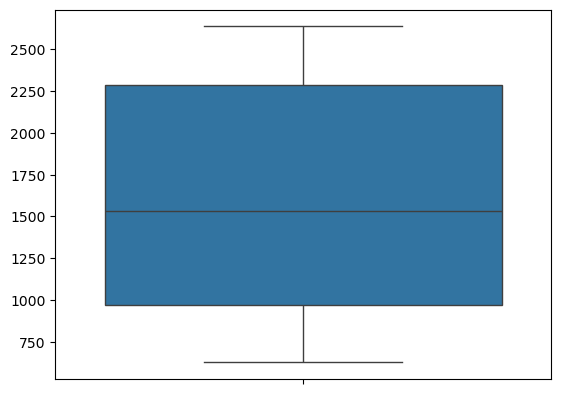

In [15]:
sns.boxplot(Data['Retailer'].value_counts().values)

In [16]:
print("The Min Date Present is ",Data["Invoice Date"].min())
print("The Max Date Present is ",Data["Invoice Date"].max())
print("The Total duration of the data is ",Data["Invoice Date"].max()-Data["Invoice Date"].min())

The Min Date Present is  2020-01-01 00:00:00
The Max Date Present is  2021-12-31 00:00:00
The Total duration of the data is  730 days 00:00:00


In [17]:
Data.City.unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

In [18]:
Data["Sales Method"].value_counts()

Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64

In [19]:
Data.Product.head()

0        Men's Street Footwear
1      Men's Athletic Footwear
2      Women's Street Footwear
3    Women's Athletic Footwear
4                Men's Apparel
Name: Product, dtype: object

# Check Duplicated data

In [20]:
Data.duplicated().sum()

0

# Check Null values

In [21]:
Data.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

# Check the numeric data correctness

Total Sales = Price per Unit * Units Sold

Operating Profit = Total Sales * Operating Margin

Let's check if these values are correct in the dataset

In [22]:
Data['Calculated Total Sales'] = Data['Price per Unit'] * Data['Units Sold']

In [23]:
Data['Calculated Operating Profit'] = Data['Calculated Total Sales'] * Data['Operating Margin']

In [24]:
incorrect_total_sales = (~Data['Calculated Total Sales'].eq(Data['Total Sales'])).sum()

In [25]:
incorrect_operating_profit = (~Data['Calculated Operating Profit'].eq(Data['Operating Profit'])).sum() 

In [26]:
incorrect_total_sales, incorrect_operating_profit

(3886, 3887)

In [27]:
Data['Total Sales'] = Data['Calculated Total Sales']
Data['Operating Profit'] = Data['Calculated Operating Profit']
Data = Data.drop(columns=['Calculated Total Sales', 'Calculated Operating Profit'])

# Let's Add additional Columns

In [28]:
Data['Week Day'] = Data['Invoice Date'].dt.day_name()
Data['Month'] = Data['Invoice Date'].dt.strftime("%B")
Data['Year'] = Data['Invoice Date'].dt.year
Data['Season'] = Data['Month'].apply(lambda x: 'Winter' if (x  in [1, 2, 12]) else 
                                            'Spring' if (x in [3, 4, 5]) else 
                                            'Summer' if (x in [6, 7, 8]) else 
                                            'Autumn')
Data['Month Year'] = Data['Invoice Date'].dt.to_period('M').astype('datetime64[ns]')

In [29]:
Data[['Type', 'Group']] = Data['Product'].str.extract(r"(Men's|Women's)\s(.*)")

In [30]:
Data.Region.value_counts()

Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

<Axes: >

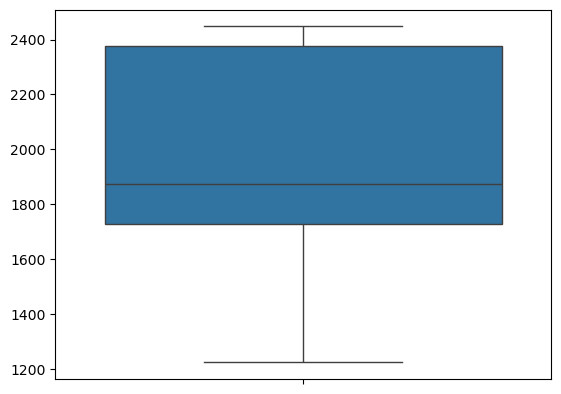

In [31]:
sns.boxplot(Data["Region"].value_counts().values)

In [32]:
Data["State"].value_counts()

State
California        432
Texas             432
New York          360
Florida           360
Mississippi       216
Oregon            216
Louisiana         216
Idaho             216
New Mexico        216
Georgia           216
Arkansas          216
Virginia          216
Oklahoma          216
Connecticut       216
Rhode Island      216
Massachusetts     216
Vermont           216
Utah              216
Arizona           216
New Hampshire     216
Pennsylvania      216
Nevada            216
Alabama           216
Tennessee         216
South Dakota      144
Illinois          144
Colorado          144
New Jersey        144
Delaware          144
Maryland          144
West Virginia     144
Indiana           144
Wisconsin         144
Iowa              144
North Dakota      144
Michigan          144
Kansas            144
Missouri          144
Minnesota         144
Montana           144
Kentucky          144
Ohio              144
North Carolina    144
South Carolina    144
Nebraska          144
Main

<Axes: >

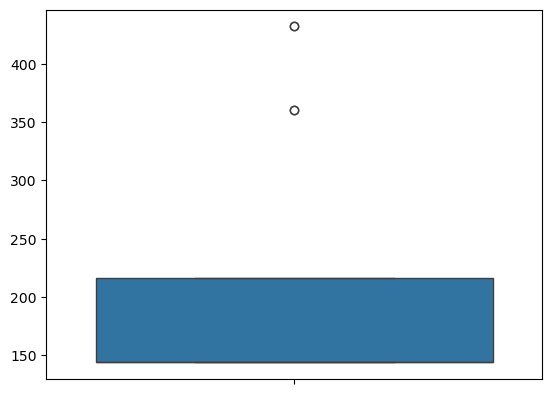

In [33]:
sns.boxplot(Data["State"].value_counts().values)

In [34]:
Data.Product.value_counts()

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64

<Axes: xlabel='Price per Unit', ylabel='Count'>

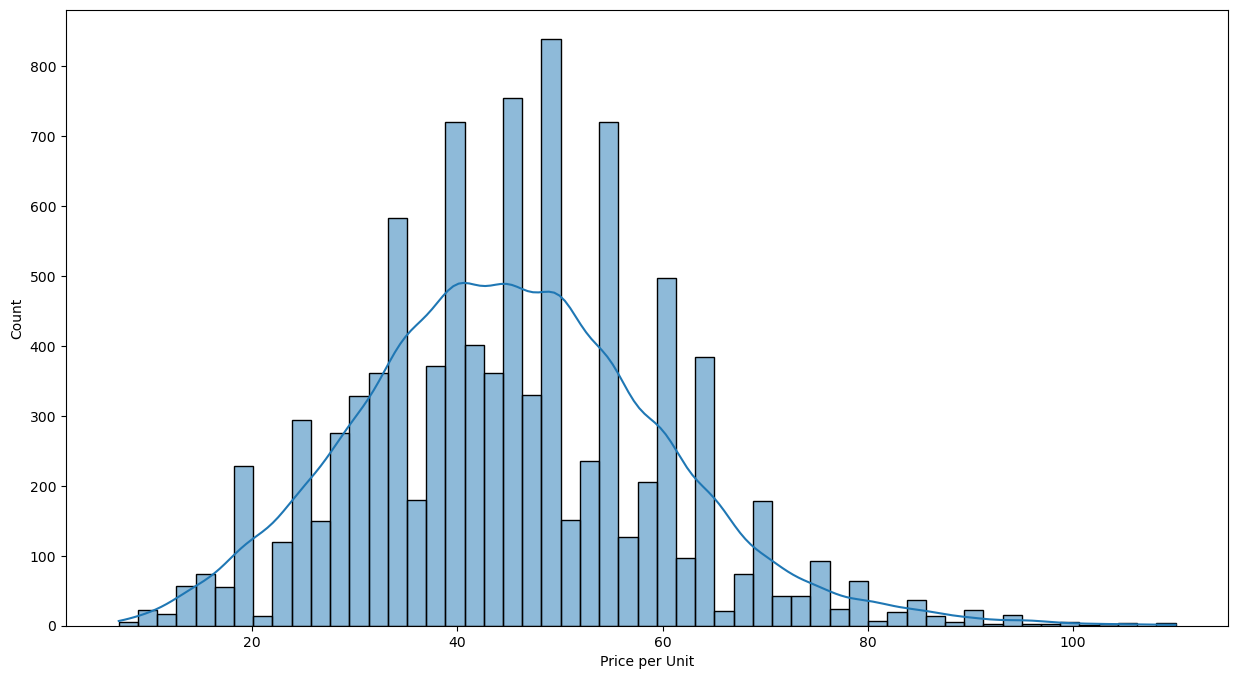

In [35]:
plt.figure(figsize = (15,8))
sns.histplot(Data["Price per Unit"],kde=True)

<Axes: xlabel='Units Sold', ylabel='Count'>

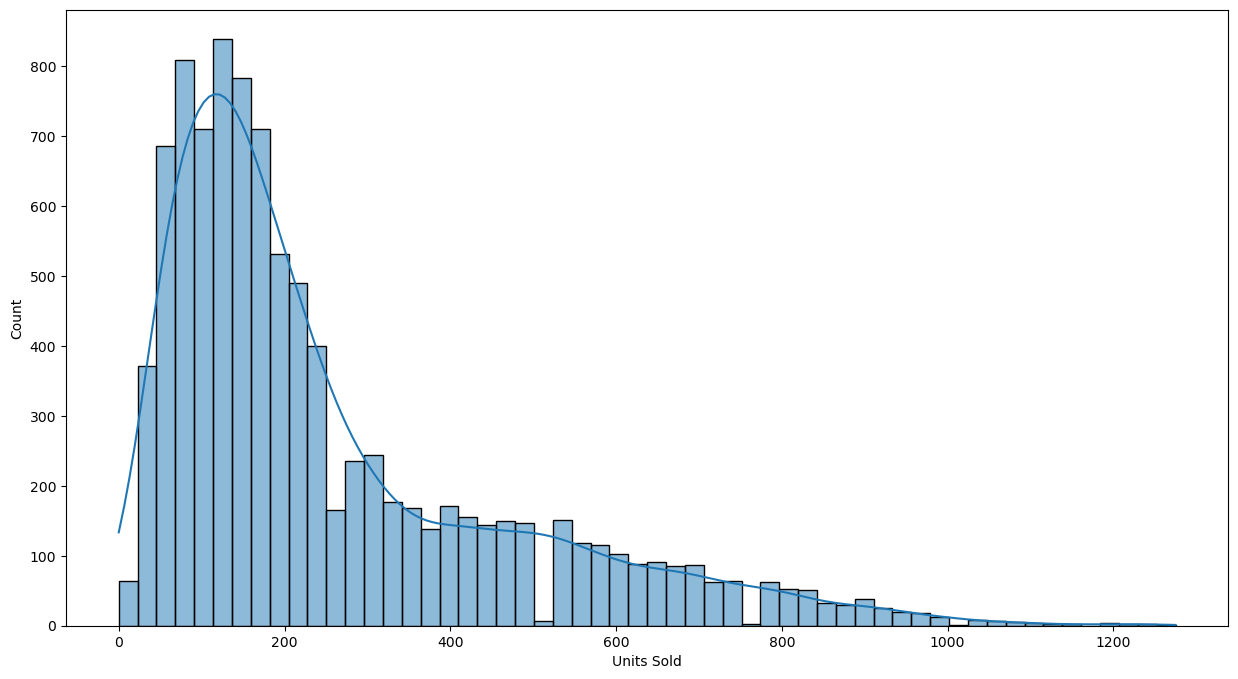

In [36]:
plt.figure(figsize = (15,8))
sns.histplot(Data["Units Sold"], kde=True)

# Top Selling Product

In [37]:
top_selling_product = Data.groupby('Product')['Total Sales'].sum().sort_values(ascending = False).reset_index()
top_selling_product.index+=1

In [38]:
top_selling_product

Product  Total Sales
1      Men's Street Footwear   27680769.0
2            Women's Apparel   23870985.0
3    Men's Athletic Footwear   20577180.0
4    Women's Street Footwear   17201563.0
5              Men's Apparel   16520632.0
6  Women's Athletic Footwear   14315521.0

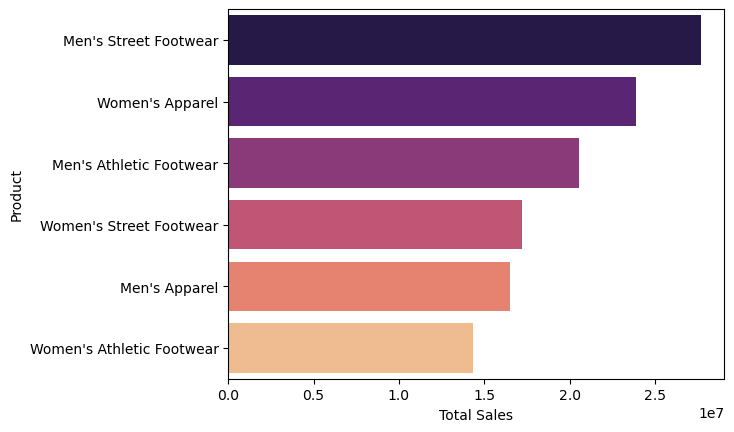

In [39]:
sns.barplot(data= top_selling_product, x = 'Total Sales', y = 'Product', palette='magma')
plt.show()

# Top Cities

In [40]:
# TOP CITIES

grossing_cities = Data.groupby('City')['Operating Profit'].sum().sort_values(ascending=False).reset_index().head(10)
grossing_cities.index+=1

In [41]:
grossing_cities

City  Operating Profit
1        New York        2114664.41
2      Charleston        2024086.36
3   San Francisco        1581993.31
4           Miami        1579387.86
5        Portland        1575860.62
6         Houston        1494772.31
7     New Orleans        1424389.74
8     Los Angeles        1378158.34
9      Birmingham        1368206.39
10        Orlando        1342206.56

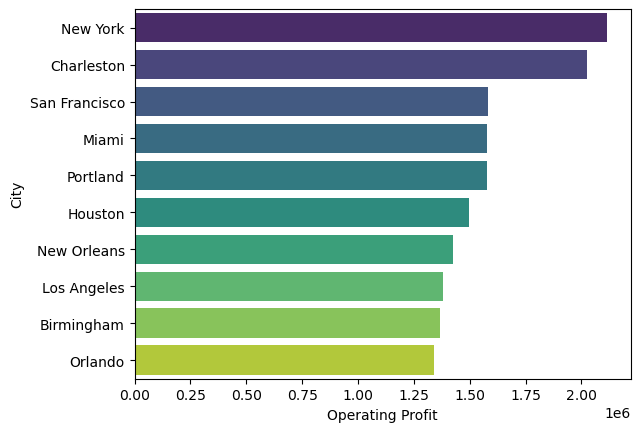

In [42]:
sns.barplot(data = grossing_cities, y= 'City', x = 'Operating Profit', palette='viridis')
plt.show()

# TOP RETAILERS

In [43]:
# TOP RETAILERS

top_retailers = Data.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False).reset_index()
top_retailers.index+=1

In [44]:
top_retailers

Retailer  Total Sales
1      West Gear   32409558.0
2    Foot Locker   29024945.0
3  Sports Direct   24616622.0
4         Kohl's   13512453.0
5        Walmart   10506085.0
6         Amazon   10096987.0

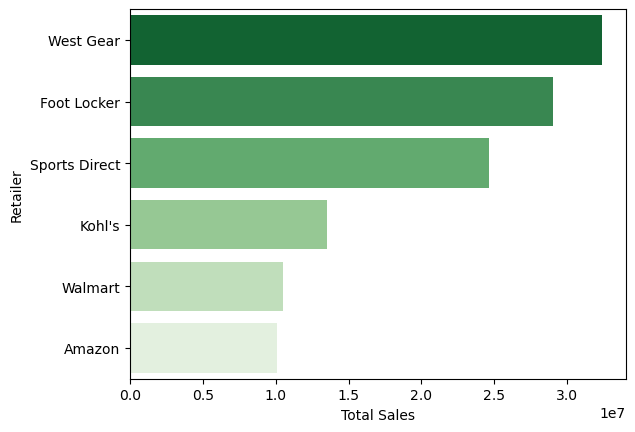

In [45]:
sns.barplot(data=top_retailers,y='Retailer',x='Total Sales',palette='Greens_r')
plt.show()

# Region

In [46]:
retailer_region = Data.groupby('Region')['Retailer ID'].count()

In [47]:
retailer_region

Region
Midwest      1872
Northeast    2376
South        1728
Southeast    1224
West         2448
Name: Retailer ID, dtype: int64

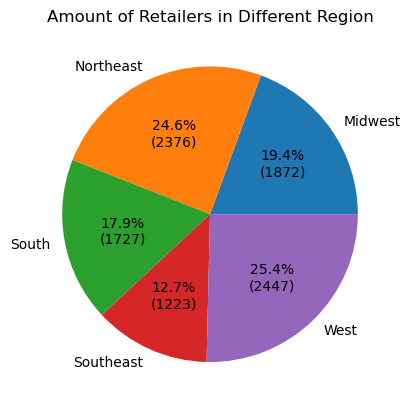

In [48]:
plt.pie(retailer_region, labels=retailer_region.index, autopct=lambda pct : f'{pct:.1f}%\n({int(pct/100*retailer_region.sum())})')
plt.title("Amount of Retailers in Different Region")
plt.show()

In [49]:
region_sales = Data.groupby('Region')['Total Sales'].sum()

In [50]:
region_sales

Region
Midwest      16674434.0
Northeast    25078267.0
South        20603356.0
Southeast    21374436.0
West         36436157.0
Name: Total Sales, dtype: float64

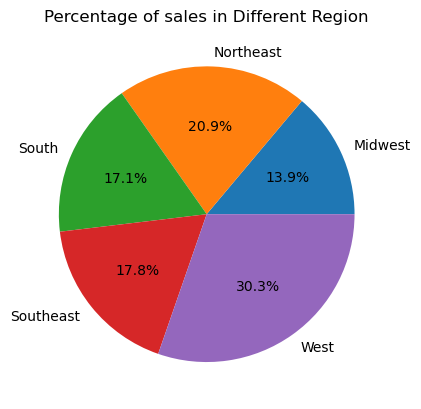

In [51]:
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title('Percentage of sales in Different Region')
plt.show()

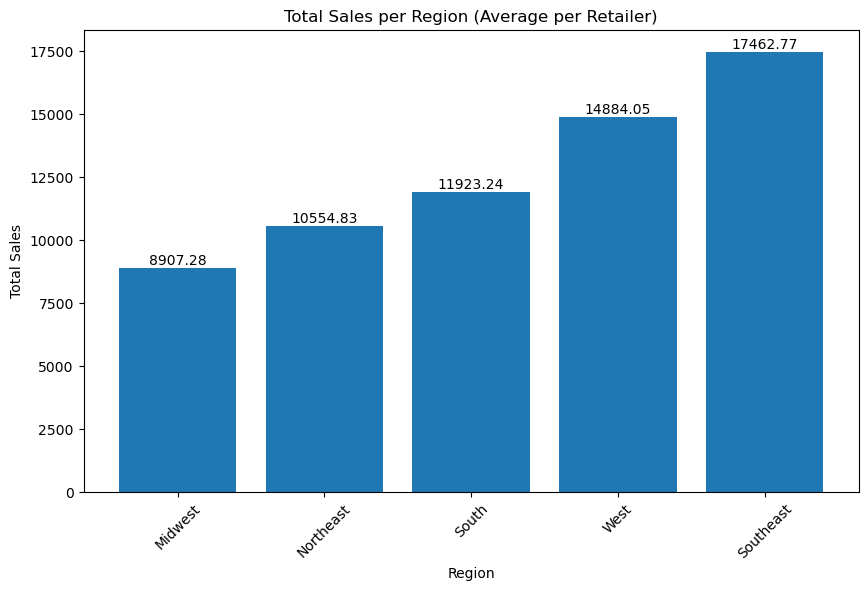

Region
Midwest       8907.283120
Northeast    10554.826178
South        11923.238426
West         14884.051062
Southeast    17462.774510
dtype: float64


In [52]:
adidas = Data.groupby('Region')['Total Sales'].sum().divide(Data.groupby('Region')['Retailer ID'].count()).sort_values()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(adidas.index, adidas.values)

# Add labels to each bar
for i, value in enumerate(adidas.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Add titles and labels
plt.title('Total Sales per Region (Average per Retailer)')
plt.xlabel('Region')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()
print(adidas)


* I fount that in Southeast Region we have bigest sales per Retailer*

* Bigest Amoun of retailers we have at West (25%)*

* And bigest sales per region we have at West (30%)*

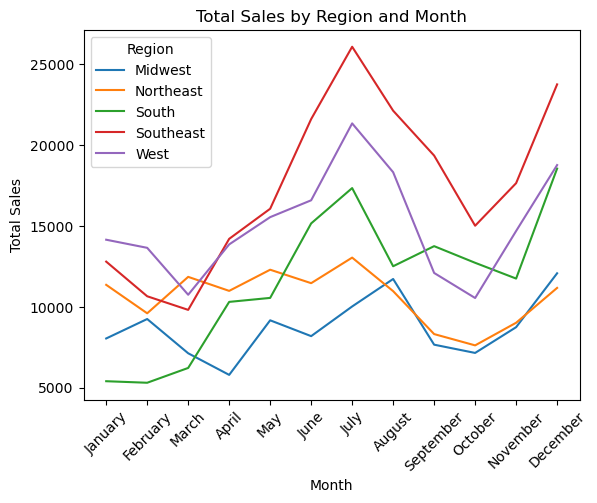

In [53]:
adidas_southeast = Data.pivot_table(values='Total Sales', index='Month', columns='Region', fill_value=0)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the pivot table with the defined month order
adidas_southeast = adidas_southeast.reindex(month_order)

# Plotting the pivot table
adidas_southeast.plot.line()
plt.xticks(range(len(adidas_southeast.index)), adidas_southeast.index)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Month')
plt.xticks(rotation=45)
# Display the plot
plt.show()


* We have an increas in Sales at Summer times and close to Christmas Holidays*

* We have two supper performing region and two underperformin and also one with average performans*

# Close look to the best performing Region (SouthEast Region ) and what States are include in it

Month               June      July    August  November  December
State                                                           
Florida         28175.06  33824.00  23750.15  19264.67  27519.17
Georgia         13789.94  14806.06  15470.06  13628.61  15732.22
Kentucky         7718.92  10654.50  10433.17   8827.92  12039.00
North Carolina  25457.17  31595.50  28471.92  23482.67  31677.58
South Carolina  29969.33  35572.42  32238.33  28394.83  35799.75
Virginia        23971.72  29899.50  21455.06  14846.78  22506.28

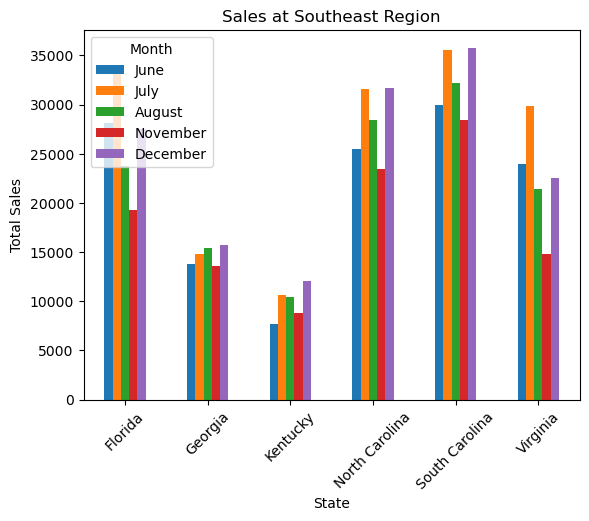

In [54]:
adidas_states = Data.pivot_table(values='Total Sales', index=['Region','State'], columns='Month', fill_value=0)
region = 'Southeast'

months = ['June', 'July', 'August', 'November', 'December']

Southeast_data = adidas_states.loc[region, months].round(2)
Southeast_data.plot.bar()
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Sales at Southeast Region')
plt.xticks(rotation=45)
Southeast_data

# Investigation about retailers

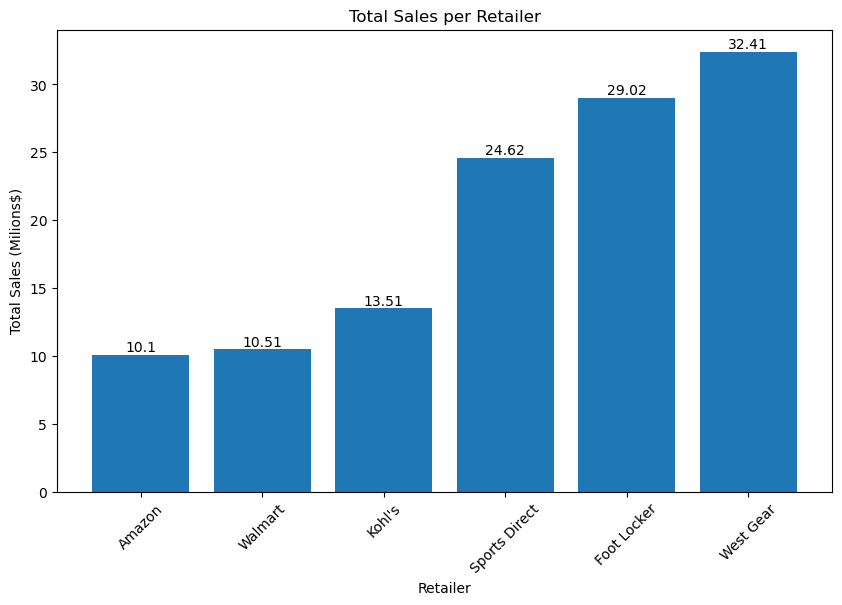

In [55]:
adidas_most=Data.groupby('Retailer')['Total Sales'].sum().sort_values()
adidas_most_milions=adidas_most/1000000

plt.figure(figsize=(10, 6))
plt.bar(adidas_most_milions.index, adidas_most_milions.values)

# Add labels to each bar
for i, value in enumerate(adidas_most_milions.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Add titles and labels
plt.title('Total Sales per Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales (Milions$)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

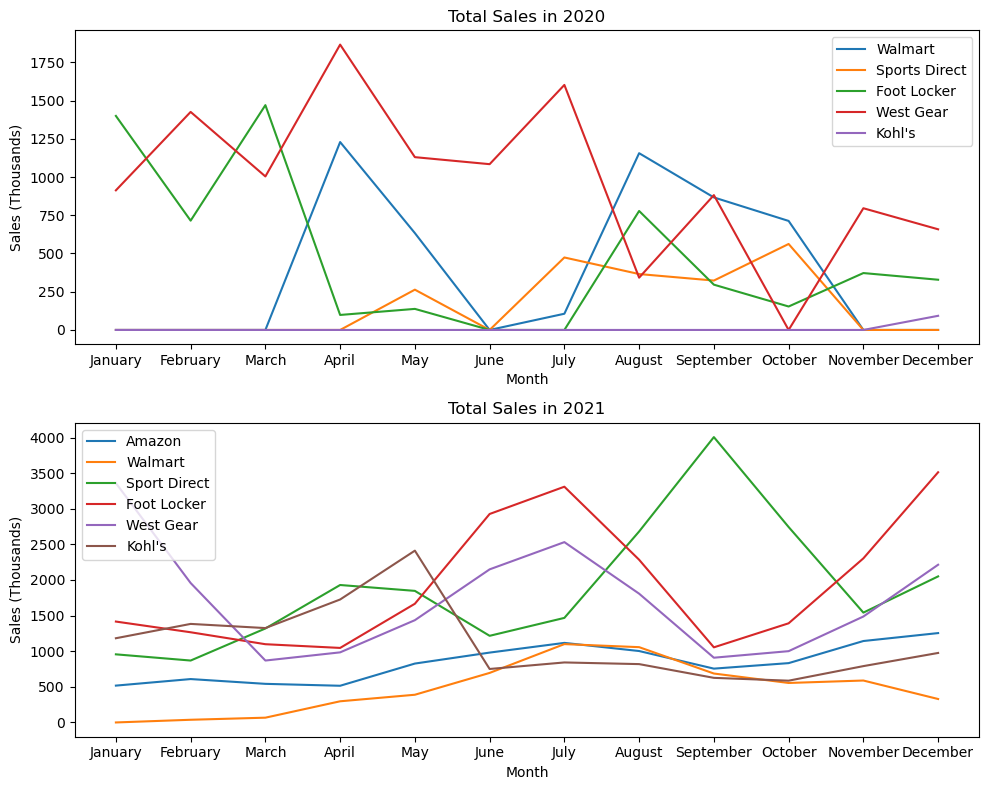

In [56]:
adidas_2020=Data[Data['Year']==2020]
adidas_2021=Data[Data['Year']==2021]

adidas_retailer_2020=pd.pivot_table(adidas_2020,values='Total Sales',index=['Month'],columns='Retailer', aggfunc=np.sum,fill_value=0)
adidas_retailer_Thousands_2020=(adidas_retailer_2020/1000).round(2)

adidas_retailer_2021=pd.pivot_table(adidas_2021,values='Total Sales',index=['Month'],columns='Retailer', aggfunc=np.sum,fill_value=0)
adidas_retailer_Thousands_2021=(adidas_retailer_2021/1000).round(2)

adidas_retailer_Thousands_2020=adidas_retailer_Thousands_2020.reindex(month_order)
adidas_retailer_Thousands_2021=adidas_retailer_Thousands_2021.reindex(month_order)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(adidas_retailer_Thousands_2020.index, adidas_retailer_Thousands_2020[['Walmart','Sports Direct','Foot Locker','West Gear']], 
             label=['Walmart','Sports Direct','Foot Locker','West Gear'])
axes[0].plot(adidas_retailer_Thousands_2020.index, adidas_retailer_Thousands_2020["Kohl's"], label="Kohl's")
# Add more lines for other retailers as needed
axes[0].set_title('Total Sales in 2020')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales (Thousands)')
axes[0].legend()

axes[1].plot(adidas_retailer_Thousands_2021.index, adidas_retailer_Thousands_2021[['Amazon','Walmart','Sports Direct','Foot Locker','West Gear']], 
             label=['Amazon','Walmart','Sport Direct','Foot Locker','West Gear'])
axes[1].plot(adidas_retailer_Thousands_2021.index, adidas_retailer_Thousands_2021["Kohl's"], label="Kohl's")
# Add more lines for other retailers as needed
axes[1].set_title('Total Sales in 2021')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Sales (Thousands)')
axes[1].legend()

plt.tight_layout()
plt.show()


For 2021

1. From our observation we can see that most summer sales appeared at "Foot Locker"& "West Gear"

2. But in same time we have outliers like "Sport Direct" which has an increase in sales at September while other retailers have decrease in sales

3. We have also "West Gear" one more outlier that has good sales at January

In 2020 we dont have much data to make a proper seasonal sales analysis about all retailers but with what we have "West Gear" leader in sales at summer and April ( I thin it was in times of lockdown)

It is enough for regional and retailer analysis for basic understanding of trend performance in regions and what season and retailer best performer in which month.

# Product

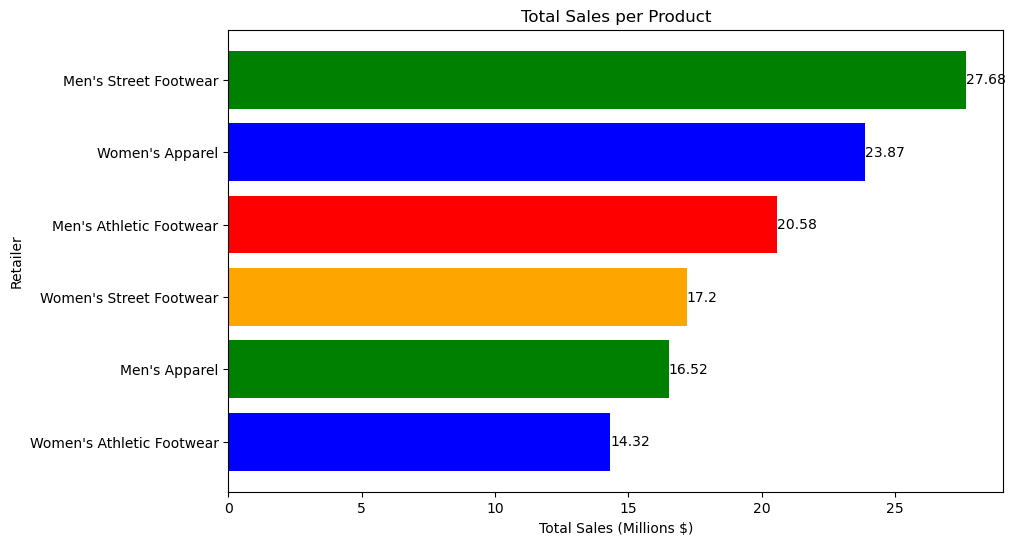

In [57]:
adidas_product_m=(Data.groupby(["Product"])['Total Sales'].sum()/1000000).round(2).sort_values()

colors = ['blue', 'green', 'orange', 'red']

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(adidas_product_m)), adidas_product_m.values, color=colors)

# Add labels to each bar
for i, (retailer, value) in enumerate(adidas_product_m.items()):
    plt.text(value, i, str(round(value, 2)), ha='left', va='center')

# Add titles and labels
plt.title('Total Sales per Product')
plt.xlabel('Total Sales (Millions $)')
plt.ylabel('Retailer')

# Set y-axis ticks and labels
plt.yticks(np.arange(len(adidas_product_m)), adidas_product_m.keys())

# Display the chart
plt.show()



##### We found top Sales Product in Adidas company for last two years

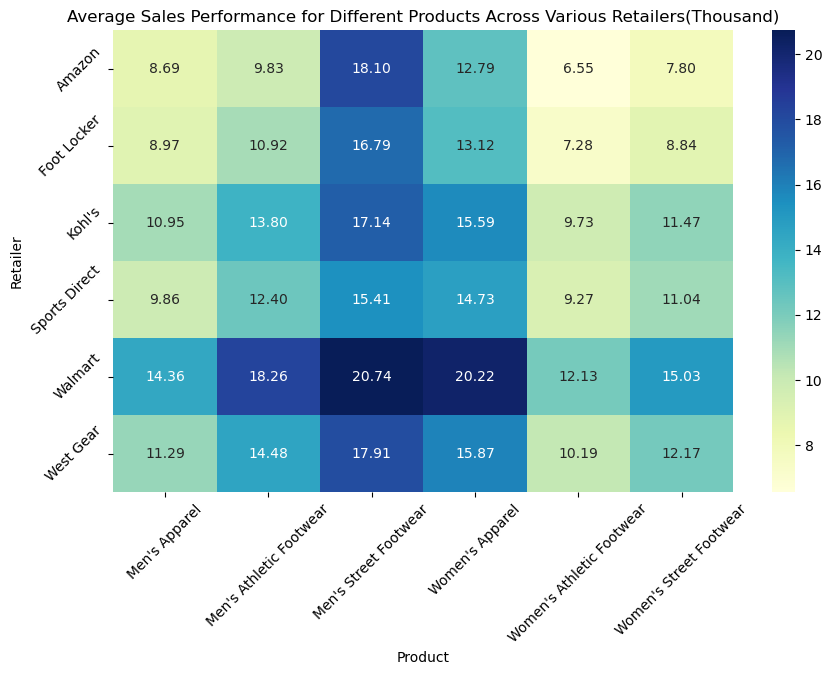

In [58]:
adidas_product_retailer_k=(Data.pivot_table(values='Total Sales',index='Retailer',columns='Product',aggfunc=np.mean)/1000).round(2)

# Create heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.heatmap(adidas_product_retailer_k, annot=True, fmt=".2f", cmap="YlGnBu")

# Set plot title and labels
plt.title("Average Sales Performance for Different Products Across Various Retailers(Thousand)")
plt.xlabel("Product")
plt.ylabel("Retailer")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# Show the plot
plt.show()

**1. Best selling product in average (Men's Street Footwear) in all our retailers**

**2. Also Walmart have a good performans in seling all of our products in average .**

**3. There is tree type of most selled average product in all our retailers and its (Men's Street Footwear,Women's Apparel,Men's Athletic Footwear)**

# Sales Methods

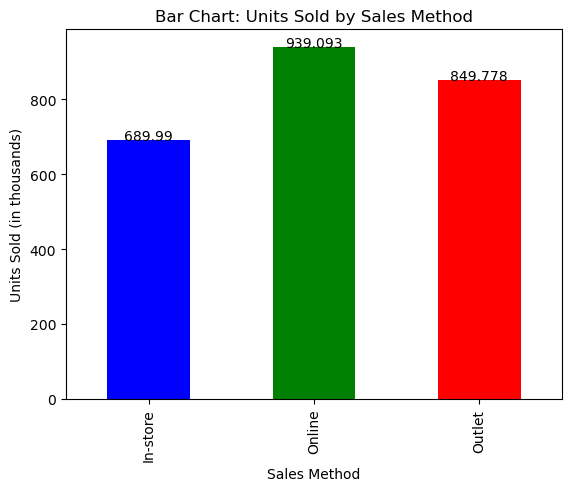

In [59]:
adidas_type_qunatity_k= Data.groupby('Sales Method')['Units Sold'].sum()/1000

colors = ['blue', 'green', 'red']
ax = adidas_type_qunatity_k.plot(kind='bar', color=colors)

# Adding labels and title to the plot
plt.xlabel('Sales Method')
plt.ylabel('Units Sold (in thousands)')
plt.title('Bar Chart: Units Sold by Sales Method')

# Adding value labels to the bars
for i, v in enumerate(adidas_type_qunatity_k):
    ax.text(i, v + 0.5, str(v), ha='center')

# Displaying the plot
plt.show()

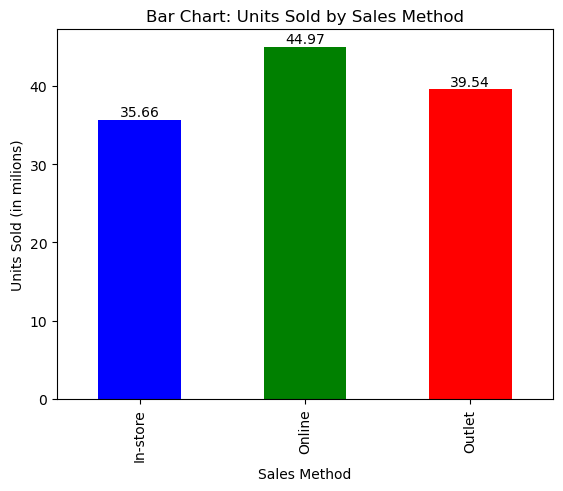

In [60]:
adidas_type_sales_m= (Data.groupby('Sales Method')['Total Sales'].sum()/1000000).round(2)

colors = ['blue', 'green', 'red']
ax = adidas_type_sales_m.plot(kind='bar', color=colors)

# Adding labels and title to the plot
plt.xlabel('Sales Method')
plt.ylabel('Units Sold (in milions)')
plt.title('Bar Chart: Units Sold by Sales Method')

# Adding value labels to the bars
for i, v in enumerate(adidas_type_sales_m):
    ax.text(i, v + 0.5, str(v), ha='center')

# Displaying the plot
plt.show()

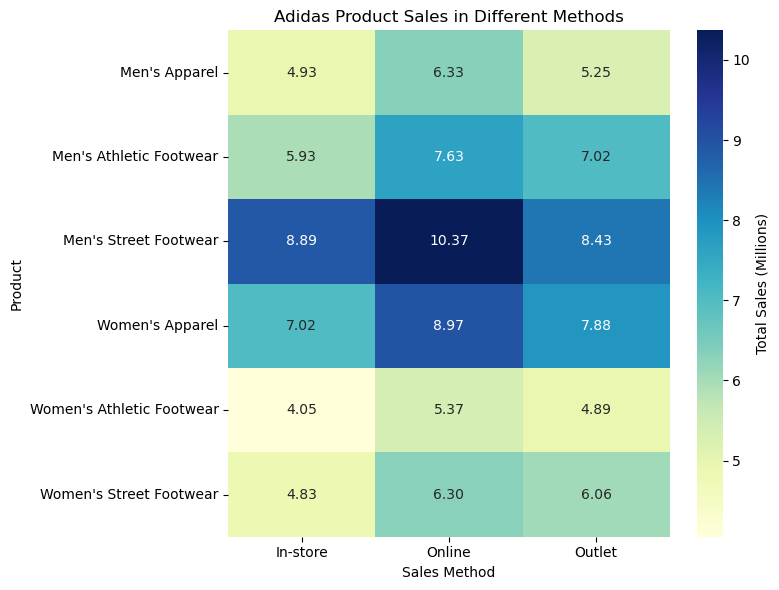

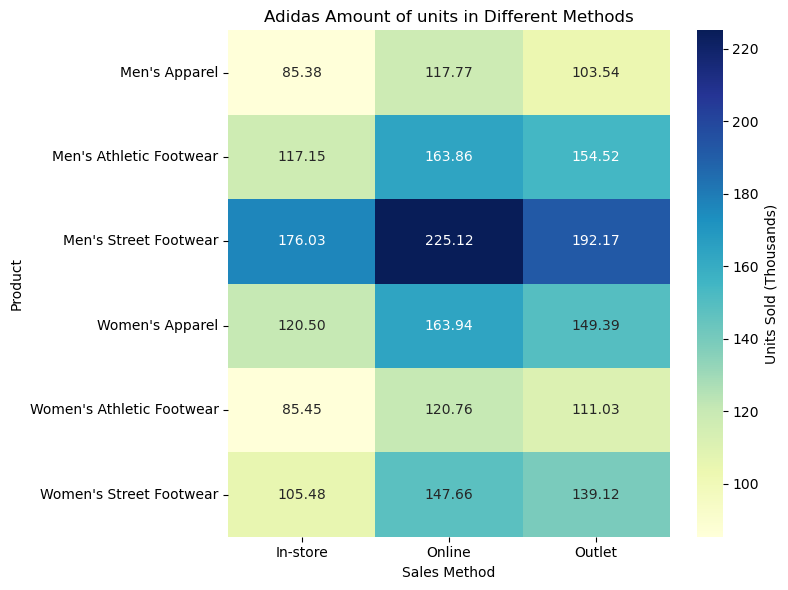

In [61]:
adidas_product_perunit=(Data.pivot_table(values='Total Sales',index=['Product'],columns='Sales Method',aggfunc=np.sum)/1000000).round(2)
adidas_product_unit=(Data.pivot_table(values='Units Sold',index=['Product'],columns='Sales Method',aggfunc=np.sum)/1000).round(2)

plt.figure(figsize=(8, 6))
sns.heatmap(adidas_product_perunit, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Total Sales (Millions)'})
plt.title('Adidas Product Sales in Different Methods')
plt.xlabel('Sales Method')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# Create the heatmap for adidas_product_unit
plt.figure(figsize=(8, 6))
sns.heatmap(adidas_product_unit, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Units Sold (Thousands)'})
plt.title('Adidas Amount of units in Different Methods')
plt.xlabel('Sales Method')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

**1. Retailer and Region with the Most Sales:**

The Southeast region has the highest sales per retailer, followed by the West region.
The West region has the highest total sales among all regions.

**2. Macro Trends in Sales:**

There is a seasonal component to Adidas sales, with an increase in sales during the summer months and close to Christmas holidays.
There are two high-performing regions (Southeast and West) and two underperforming regions, while one region has an average performance.

**3. Top Selling Products:**

Best selling product in average (Men's Street Footwear) in all our retailers

Also Walmart have a good performans in seling all of our products in average .

There is tree type of most selled average product in all our retailers and its (Men's Street Footwear,Women's Apparel,Men's Athletic Footwear)

**4. Top Sales Method:**

Its appear that with less quantity of sales in-shop they produce more income then online and outlets.What is very weird for me always thought the online and outlets produce more profit than store selling

**5. Retailer Analysis:**

The Southeast region consists of states like Florida, Georgia, Kentucky, North Carolina, South Carolina, and Virginia, which contribute significantly to sales in that region.
Some retailers have higher total sales than others, but a comprehensive analysis of retailer performance requires further examination.

# Sales BY MONTH

In [62]:
sales_by_month= Data.groupby(['Month','Year'])['Total Sales'].sum().sort_index(ascending=True).reset_index()
sales_by_month.index+=1

In [63]:
sales_by_month

Month  Year  Total Sales
1       April  2020    3193081.0
2       April  2021    6498339.0
3      August  2020    2641630.0
4      August  2021    9651596.0
5    December  2020    1079202.0
6    December  2021   10336130.0
7    February  2020    2140813.0
8    February  2021    6123040.0
9     January  2020    2312746.0
10    January  2021    7432021.0
11       July  2020    2182388.0
12       July  2021   10368031.0
13       June  2020    1084194.0
14       June  2021    8718953.0
15      March  2020    2474202.0
16      March  2021    5220782.0
17        May  2020    2164764.0
18        May  2021    8576956.0
19   November  2020    1168050.0
20   November  2021    7855390.0
21    October  2020    1428569.0
22    October  2021    7110189.0
23  September  2020    2367686.0
24  September  2021    8037898.0

In [64]:
import plotly.express as px
line = Data.groupby('Invoice Date')[['Total Sales','Operating Profit']].sum().reset_index()
line.index+=1

In [65]:
line

Invoice Date  Total Sales  Operating Profit
1     2020-01-01     119516.0          56444.34
2     2020-01-02      97660.0          34247.16
3     2020-01-03      90323.0          30716.01
4     2020-01-04      88580.0          34848.02
5     2020-01-05     100329.0          34066.56
..           ...          ...               ...
720   2021-12-27      80353.0          40409.39
721   2021-12-28      40010.0          15009.10
722   2021-12-29      28859.0          12381.09
723   2021-12-30      22778.0           9123.03
724   2021-12-31      26534.0           9065.59

[724 rows x 3 columns]

In [66]:
fig = px.line(line, x="Invoice Date", y="Total Sales", title='Sales')
fig.show()

In [67]:
px.bar( grossing_cities, y= 'City', x = 'Operating Profit')